In [1]:
import pandas as pd

import plotly.express as px
import seaborn as sns

import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [2]:
dfs = {
    'wsb': pd.read_parquet('wsb_to_march152020.pqt')
}

for sub in dfs.keys():
    dfs[sub].created_utc = pd.to_datetime(pd.to_datetime(dfs[sub].created_utc, unit='s').dt.strftime('%Y-%m-%d'))
    dfs[sub]['removed_bool'] = dfs[sub].is_removed.replace({0:0, 1:1, 2:1})

Explanation for the code below: 
since graph objects don't support the hue/groupby system that express does, I created a dictionary containing each grouped value and added the traces to the right subplot, and then matched the axes to have the same effect as facetting.

In [27]:
def plot_removed_ratio(df, title=None):
    ir_df = df.groupby([pd.Grouper(key='created_utc', freq='W-MON'), 'is_removed'])['id'].count().reset_index().rename({'id': 'count'}, axis=1)
    rb_df = df.groupby([pd.Grouper(key='created_utc', freq='W-MON'), 'removed_bool'])['id'].count().reset_index().rename({'id': 'count'}, axis=1)

    ir_dict = {}
    rb_dict = {}
    for i in range(3):
        ir_dict[f'is_{i}'] = ir_df[ir_df.is_removed == i].reset_index(drop=True)

    for i in range(2):
        rb_dict[f'is_{i}'] = rb_df[rb_df.removed_bool == i].reset_index(drop=True)

    fig = make_subplots(rows = 2, cols = 1, row_heights=[10,10])
    name = {0: 'Visible', 1: 'Removed', 2: 'Deleted'}

    for enum, key in enumerate(ir_dict.keys()):
        fig.add_trace(
            go.Scatter(x=ir_dict[key]['created_utc'], y=ir_dict[key]['count'], name=name[enum]), 1,1
        )
    for enum, key in enumerate(rb_dict.keys()):
        fig.add_trace(
            go.Scatter(x=rb_dict[key]['created_utc'], y=rb_dict[key]['count'], name=name[enum]), 2,1
        )    
    fig.update_xaxes(matches='x')
    fig.update_layout(
        title = {'text': title, 'x': 0.4, 'y':0.9, 'xanchor': 'center', 'yanchor': 'top'}, 
        height=700
    )
    fig.show()

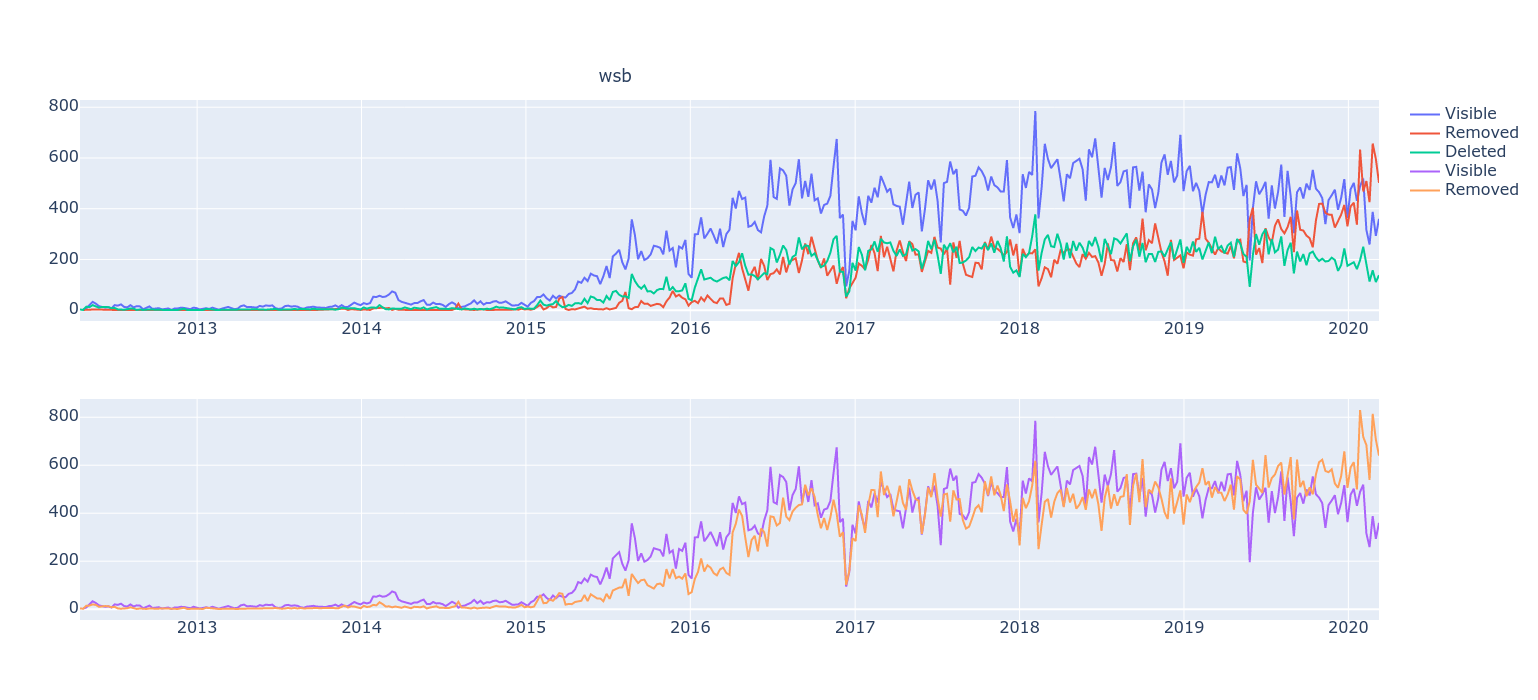

In [28]:
plot_removed_ratio(dfs['wsb'], 'wsb')